In [2]:
import idx2numpy
import cv2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
from torchvision import transforms 
import torchvision
np.set_printoptions(threshold=np.inf)
# vehicle verify --specification Superclass/superclass.vcl --network classifier:Superclass/models/model.onnx --parameter epsilon:0.005 --dataset images:dataset/images.idx --dataset labels:dataset/labels.idx --verifier Marabou

In [3]:
from random import shuffle
import torch.utils


PATH = "../dataset/GTSRB/Training"
_N = 32


batch_size = 2048
transform = transforms.Compose([
    transforms.Resize((_N,_N)),
    transforms.ToTensor(),
    transforms.Grayscale()
])
dataset = torchvision.datasets.ImageFolder(root=PATH, transform=transform)
loader = torch.utils.data.DataLoader(dataset,
                                     batch_size=batch_size,
                                     num_workers=6,
                                     shuffle=False)


In [4]:
GROUP_NAMES = ["Unique Signs","Danger Signs","Derestriction Signs","Speed Limit Signs","Other Prohibitory Signs","Mandatory Signs"]
GROUPS = [3,3,3,3,3,3,2,3,3,4,4,1,0,0,0,4,4,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,5,5,5,5,5,5,5,5,2,2]

In [5]:
_images = []
_labels = []

for image,label in loader:
    size = len(label)
    _images.extend(torch.Tensor.numpy(image.reshape((size,_N,_N)),force=True))
    _labels.extend(torch.Tensor.numpy(label,force=True))

In [6]:
unique = set()
for ele in _labels:
    unique.add(ele)
unique

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42}

In [7]:
images = np.array(_images,dtype=np.float64)
labels = np.array(_labels,dtype=np.uint8)
groups = np.array([GROUPS[i] for i in labels])

In [8]:
print(labels.shape)
print(images.shape)

(39209,)
(39209, 32, 32)


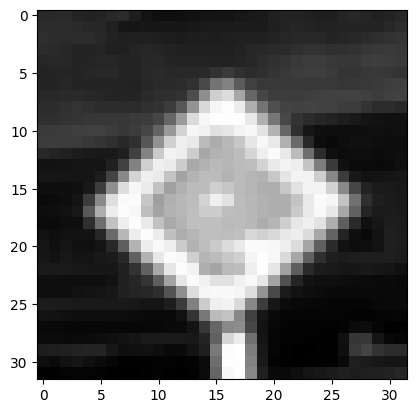

In [9]:
plt.imshow(images[20000],cmap="gray")

In [10]:
images.shape[:3]

(39209, 32, 32)

In [11]:
def write_idx(imgs,labels,n):
    imgs = imgs.reshape(imgs.shape[:3])
    frequency = np.zeros(shape=43)
    save_imgs = np.zeros((n*43,_N,_N),dtype=np.float64)
    save_labels = np.zeros(n*43,dtype=np.uint8)
    counter = 0
    for img,label in zip(imgs,labels):
        if frequency[label] >= n:
            continue
        frequency[label] += 1
        save_imgs[counter] = img
        save_labels[counter] = label
        counter += 1

    path = Path("../dataset") 
    save_labels = np.array([GROUPS[i] for i in save_labels],dtype=np.uint8)
    print(frequency)
    idx2numpy.convert_to_file(str(path / "images.idx"),save_imgs)
    idx2numpy.convert_to_file(str(path / "labels.idx"),save_labels)
write_idx(images,labels,1)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


(43, 32, 32)
>f8
[[0.27527416 0.2738663  0.25543258 0.24799491 0.2867173  0.22979687
  0.24761452 0.25791022 0.21134549 0.15900433 0.19344276 0.22185217
  0.1813596  0.1645204  0.16852589 0.16690706 0.14382747 0.14310236
  0.13962825 0.16170511 0.1709553  0.17317255 0.19482668 0.22165883
  0.23005727 0.32039571 0.30200434 0.27027217 0.18195766 0.20529139
  0.24252158 0.27934706]
 [0.25174707 0.29230002 0.26691806 0.23450315 0.28353882 0.26109964
  0.30538708 0.23167649 0.16198941 0.16017649 0.16531177 0.25848395
  0.21110982 0.17360157 0.1644357  0.17285216 0.15247922 0.13679452
  0.14322902 0.17792118 0.17395766 0.17464039 0.17700902 0.1934855
  0.18519609 0.26232082 0.27508748 0.26505217 0.18660432 0.19676629
  0.22037765 0.26536632]
 [0.2496808  0.3022753  0.28473571 0.2292408  0.2736302  0.27100825
  0.26553491 0.23491491 0.18338354 0.16705805 0.18378785 0.28290513
  0.23229256 0.18766707 0.20481962 0.18619256 0.17754079 0.14342237
  0.17131765 0.18248275 0.16121531 0.15365098 0.16

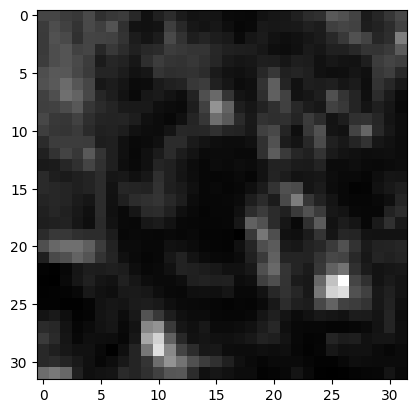

In [13]:
def func():
    # Reading
    path = Path("../dataset")
    i = 40
    ndarr = idx2numpy.convert_from_file(str(path / "images.idx"))
    print(ndarr.shape)
    print(ndarr.dtype)
    print(ndarr[i])
    plt.imshow(ndarr[i],cmap="gray") # 20 30 50 60
    ndarr = idx2numpy.convert_from_file(str(path / "labels.idx"))
    print(ndarr.shape)
    print(ndarr.dtype)
    print(ndarr)
    print(GROUP_NAMES[ndarr[i]])
func()